# Modeling via Python
## Numerical solution of the problem
#### 1. Simulation of the evolution of an epidemic by the SIR model
We start by importing the python libraries that we will use later...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

#### Etude numérique de la méthode d'Euler :
Définition de euler() :

In [2]:
def euler(f,y0,t0,T,n):
    t = np.zeros(n)
    y = np.zeros(n)
    y[0] = y0
    t[0] = t0
    h = (T-t0)/n
    for k in (range(n-1)):
        t[k+1] = t[k] + h
        y[k+1] = y[k] + h*f(y[k],t[k])
    return y

Définition de compare() :

In [3]:
def compare(y_euler,f_true,t0,T,n):
    fig = plt.figure() #fig non utilisée??
    t_euler = np.linspace(t0,T,n)
    t_true = np.linspace(t0,T,(T-t0)*100)
    y_true = f_true(t_true) #would be better to plot the real function instead of many points
    plt.plot(t_euler,y_euler,'b.-',t_true,y_true,'r-')
    plt.title("Comparaison de courbes")
    plt.show()

On run compare() :

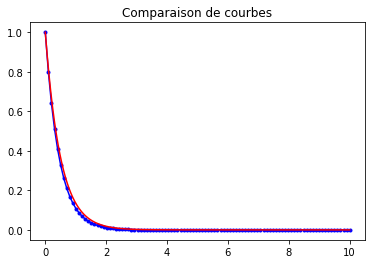

In [4]:
    f = lambda y,t : -2*y
    y0 = 1
    t0 = 0
    T = 10
    n = 100

    y_euler = euler(f,y0,t0,T,n)

    f_true = lambda t : np.exp(-2*t)

    compare(y_euler,f_true,t0,T,n)

#### We now model an epidemic using a SIR model: 
We start by putting the partial differential equations presented earlier into function form:

In [5]:
def f(y,beta,lambd):
    (S,I,R) = y[:,0]
    x = np.array([[-beta*I*S], [beta*I*S - I/lambd], [I/lambd]])
    return x

We display the different functions using matplot :

In [6]:
def schema_num(methode,I0,t0,T,n,beta,Lambda,S_state,I_state,R_state):
    """ Program returning a matrix including the iterated values of S, I and R 
    according to the chosen method, for t ranging from t0 to T"""
    
    h = (T-t0)/n
    values = np.array([[1.0-I0],[I0],[0]])
    y = np.array([[1.0-I0],[I0],[0]])
    
    for k in range(n-1):
        if methode == "Euler":
            y = y + h*f(y,beta,Lambda)
        if methode == "modified Euler":
            y = y + h*f(y+h/2*f(y,beta,Lambda),beta,Lambda)
        if methode == "Runge Kutta 2nd order":
            y = y + h/2*(f(y,beta,Lambda)+f(y+h*f(y,beta,Lambda),beta,Lambda))
        if methode == "Runge Kutta 4th order":
            k1 = f(y,beta,Lambda)
            k2 = f(y + h/2*k1,beta,Lambda)
            k3 = f(y + h/2*k2,beta,Lambda)
            k4 = f(y + h*k3,beta,Lambda)
            y = y + h/6*(k1+2*k2+2*k3+k4)
        values = np.append(values,y,1)
    t = np.linspace(t0,T,n)
    plt.figure(figsize=(12, 7))
    plt.xlim(xmin=0,xmax=T)
    if S_state:
        plt.plot(t, values[0], label='S', c='b')
    if I_state:
        plt.plot(t, values[1], label='I', c='orange')
    if R_state:
        plt.plot(t, values[2], label='R', c='g')
    plt.title("Plotting the SIR model with the "+ methode+" method" ,fontsize=16)
    plt.legend()
    plt.show()

widgets.interact(schema_num, Lambda = widgets.FloatSlider(value=5.0,min=0.1,max=10.0,step=0.1), beta = widgets.FloatSlider(value=0.5,min=0.01,max=1.0,step=0.01), I0 = widgets.FloatSlider(value=0.1,min=0.0,max=1.0,step=0.01), n=widgets.IntSlider(value=200,min=20,max=1000,step=10),methode = ['Euler','modified Euler',"Runge Kutta 2nd order","Runge Kutta 4th order"],t0=widgets.fixed(0),T=widgets.IntSlider(value=50,min=10,max=500,step=10),S_state = widgets.Checkbox(value=True,description='S'),I_state = widgets.Checkbox(value=True,description='I'),R_state = widgets.Checkbox(value=True,description='R'));

interactive(children=(Dropdown(description='methode', options=('Euler', 'modified Euler', 'Runge Kutta 2nd ord…

## Convergence study
We will study the convergence of our numerical methods in comparison with RK4, which we consider as exact

In [7]:
def schema_num2(method,I0,t0,T,n,beta,Lambda,S_state,I_state,R_state):
    """ Program returning a matrix including the iterated values of S, I and R 
    according to the chosen method, for t ranging from t0 to T"""
    
    h = (T-t0)/n
    values = np.array([[1.0-I0],[I0],[0]])
    y = np.array([[1.0-I0],[I0],[0]])
    
    for k in range(n-1):
        if method == "Euler":
            y = y + h*f(y,beta,Lambda)
        if method == "modified Euler":
            y = y + h*f(y+h/2*f(y,beta,Lambda),beta,Lambda)
        if method == "Runge Kutta 2nd order":
            y = y + h/2*(f(y,beta,Lambda)+f(y+h*f(y,beta,Lambda),beta,Lambda))
        values = np.append(values,y,1)
    t = np.linspace(t0,T,n)
    plt.figure(figsize=(12, 7))
    plt.xlim(xmin=0,xmax=T)
    if S_state:
        plt.plot(t, values[0], '--', label='S', color = 'b')
    if I_state:
        plt.plot(t, values[1], '--', label='I', color = 'orange')
    if R_state:
        plt.plot(t, values[2], '--', label='R', color = 'g')
    
    
    ##########
    # RK4 plot
    
    n_2 = 1000
    h_2 = (T-t0)/n_2
    values_2 = np.array([[1.0-I0],[I0],[0]])
    y_2 = np.array([[1.0-I0],[I0],[0]])
    
    for k in range(n_2-1):
        k1 = f(y_2,beta,Lambda)
        k2 = f(y_2 + h_2/2*k1,beta,Lambda)
        k3 = f(y_2 + h_2/2*k2,beta,Lambda)
        k4 = f(y_2 + h_2*k3,beta,Lambda)
        y_2 = y_2 + h_2/6*(k1+2*k2+2*k3+k4)
        values_2 = np.append(values_2,y_2,1)
    
    t_2 = np.linspace(t0,T,n_2)
    
    plt.plot(t_2, values_2[0], label='exact S', color = 'c')
    plt.plot(t_2, values_2[1], label='exact I', color = 'red')
    plt.plot(t_2, values_2[2], label='exact R', color = 'lime')
    
    
    plt.title("comparison of the " + method + " method with the RK4 method", fontsize=16)
    plt.legend()
    plt.show()

widgets.interact(schema_num2, Lambda = widgets.FloatSlider(value=5.0,min=0.1,max=10.0,step=0.1), beta = widgets.FloatSlider(value=0.5,min=0.01,max=1.0,step=0.01), I0 = widgets.FloatSlider(value=0.1,min=0.0,max=1.0,step=0.01), n=widgets.IntSlider(value=100,min=20,max=1000,step=10),method = ['Euler','modified Euler',"Runge Kutta 2nd order"],t0=widgets.fixed(0),T=widgets.IntSlider(value=50,min=10,max=500,step=10),S_state = widgets.Checkbox(value=True,description='S'),I_state = widgets.Checkbox(value=True,description='I'),R_state = widgets.Checkbox(value=True,description='R'));

interactive(children=(Dropdown(description='method', options=('Euler', 'modified Euler', 'Runge Kutta 2nd orde…

### Comparison of SIR model with some real data

In [8]:
def schema_num3(methode,I0,t0,T,n,beta,Lambda,S_state,I_state,R_state):
    """ Program returning a matrix including the iterated values of S, I and R 
    according to the chosen method, for t ranging from t0 to T"""
    
    h = (T-t0)/n
    values = np.array([[1.0-I0],[I0],[0]])
    y = np.array([[1.0-I0],[I0],[0]])
    
    for k in range(n-1):
        if methode == "Euler":
            y = y + h*f(y,beta,Lambda)
        if methode == "modified Euler":
            y = y + h*f(y+h/2*f(y,beta,Lambda),beta,Lambda)
        if methode == "Runge Kutta 2nd order":
            y = y + h/2*(f(y,beta,Lambda)+f(y+h*f(y,beta,Lambda),beta,Lambda))
        if methode == "Runge Kutta 4th order":
            k1 = f(y,beta,Lambda)
            k2 = f(y + h/2*k1,beta,Lambda)
            k3 = f(y + h/2*k2,beta,Lambda)
            k4 = f(y + h*k3,beta,Lambda)
            y = y + h/6*(k1+2*k2+2*k3+k4)
        values = np.append(values,y,1)
    t = np.linspace(t0,T,n)

    img = plt.imread("Measles_real_values.png") 

    plt.figure(figsize=(12, 7))
    plt.xlim(xmin=0,xmax=T)
    plt.imshow(img, extent=[0, 50, 0, 50])  
    if S_state:
        plt.plot(t, values[0]*50,":", label='S', c='g')
    if I_state:
        plt.plot(t, values[1]*50,":", label='I', c='r')
    if R_state:
        plt.plot(t, values[2]*50,":", label='R', c='b')
    plt.title("--- à changer ---"+ methode+" method" ,fontsize=16)
    plt.legend()
    plt.show()

widgets.interact(schema_num3, Lambda = widgets.FloatSlider(value=7.45,min=0.1,max=10.0,step=0.05), beta = widgets.FloatSlider(value=0.5,min=0.01,max=1.0,step=0.01), I0 = widgets.FloatSlider(value=0.01,min=0.01,max=1.0,step=0.01), n=widgets.IntSlider(value=200,min=20,max=1000,step=10),methode = ['Euler','modified Euler',"Runge Kutta 2nd order","Runge Kutta 4th order"],t0=widgets.fixed(0),T=widgets.IntSlider(value=50,min=10,max=500,step=10),S_state = widgets.Checkbox(value=True,description='S'),I_state = widgets.Checkbox(value=True,description='I'),R_state = widgets.Checkbox(value=True,description='R'));

interactive(children=(Dropdown(description='methode', options=('Euler', 'modified Euler', 'Runge Kutta 2nd ord…

# Cells spacial simulation:
Here we simulate the spread of the epidemic using a very different approach.  
We represent each individual of the population by a cell. We then create a matrix containing these cells and we apply some simple rules:
- As for the sir model, each cell has three possible states: S, I & R.
- We place in the cellMap (the matrix of cells), a number of initially infected cells.
- At each 'tick', a healthy cell adjacent to an infected cell has a "CONTAGION" probability of being infected.
- At each 'tick' an infected cell has a probability of "RECOVER" to go from stage I (infected) to stage R (recovered).
- A recovered cell cannot be infected again.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image, ImageDraw
import matplotlib.image as mpimg
import IPython.display

CONTAGION = 0.2 #20% of chances to infect adjacent cell
RECOVER = 0.05 #5% chance to recover

def decision(probability): #returns boolean probabilistically based
    return random.random() < probability

class Cell:
    def __init__(self,line, column, state):
        self.line = line
        self.column = column
        self.state = state #state 0: Susceptible, 1: Infectious, 2: Recoverd (SIR MODEL)

    def tick(self):
        print('cell at pos ' + str(self.line) + ',' + str(self.column) + ' Ticked !')
        if self.state == 1:
            self.infect()
            self.recover()
        return
    
    def infect(self):
        self.state = 1
        return
    
    def recover(self):
        self.state = 2
        return


class CellMap:
    def __init__(self,lines,columns):
        self.SIR = [0,0,0]
        self.createMap(lines,columns)
        self.lines = lines
        self.columns = columns


    
    def createMap(self,lines,columns):
        array = np.zeros((lines,columns))
        array = array.astype('object_') #allows to store any object, not only floats
        printableArray = np.zeros((lines,columns))
    
        for l in range(array.shape[0]):
            for c in range(array.shape[1]):
                array[l,c] = Cell(l,c,0)
                printableArray[l,c] = 0
        
        self.cellArray = array.copy()
        self.printableArray = printableArray.copy()
        self.SIR[0] = self.cellArray.shape[0]*self.cellArray.shape[1]


    def tick(self):
        nextCellArray = self.cellArray.copy()
        for l in range(self.cellArray.shape[0]):
            for c in range(self.cellArray.shape[1]):
                
                cell = self.cellArray[l,c]
                if cell.state == 1:
                    # print(str(l) + ',' + str(c))
                    for lAdjacent,cAdjacent in self.AdjacentCells(l,c):
                        # print(str(lAdjacent) + ',' + str(cAdjacent))
                        if decision(CONTAGION):
                            self.infectCell(lAdjacent,cAdjacent,nextCellArray)

                    if decision(RECOVER): #at term we will need to implement it as a normal map
                        self.recoverCell(l,c,nextCellArray)
        # print(self.SIR)

        
        self.cellArray = nextCellArray.copy()

    def infectCell(self,l,c,cellArray = None):
        if cellArray is None:
            cellArray = self.cellArray
        
        if cellArray[l,c].state ==0:
            cellArray[l,c].infect()
            self.printableArray[l,c] = 1  
            self.SIR[0] -= 1
            self.SIR[1] += 1        

    def recoverCell(self,l,c,cellArray = None):
        if cellArray is None:
            cellArray = self.cellArray
        cellArray[l,c].recover()
        self.printableArray[l,c] = 2    
        self.SIR[1] -= 1
        self.SIR[2] += 1                   

    def AdjacentCells(self,l,c):
        adjacentCells = []
        for lOffset in range(-1,2):
            for cOffset in range(-1,2):
                if l + lOffset in range(self.lines) and c + cOffset in range(self.columns) and (l + lOffset != l or c + cOffset != c):
                    adjacentCells.append((l+lOffset,c+cOffset))
        # adjacentCells = [(l-1,c-1),(l-1,c),(l-1,c+1),(l,c-1),(l,c+1),(l+1,c-1),(l+1,c),(l+1,c+1)]
        
        # print(adjacentCells)
        return adjacentCells
    
    def placeInitialInfected(self,numberOfInitialInfected):
        for i in range(numberOfInitialInfected):
            l = random.randrange(self.lines)
            c = random.randrange(self.columns)
            self.infectCell(l,c)




class Simulation:
    def __init__(self,cellMap):
        self.cellMap = cellMap
        self.steps = [[],[],[],[]] #each simulation steps [printableMatrixList],[SList],[IList],[RList]
        
        

    def plot(self):
        t = np.linspace(0,self.numberOfTicks +1 ,self.numberOfTicks +1)

        SList = self.steps[1]
        IList = self.steps[2]
        RList = self.steps[3]

        S = plt.plot(t, SList, label='S')
        I = plt.plot(t, IList, label='I')
        R = plt.plot(t, RList, label='R')
        plt.show()
        return
    
    def run(self,numberOfTicks):
        self.numberOfTicks = numberOfTicks
        self.steps[0].append(self.cellMap.printableArray.copy())
        self.steps[1].append(self.cellMap.SIR[0])
        self.steps[2].append(self.cellMap.SIR[1])
        self.steps[3].append(self.cellMap.SIR[2])
        for i in range(numberOfTicks):
            self.cellMap.tick()
            self.steps[0].append(self.cellMap.printableArray.copy())
            self.steps[1].append(self.cellMap.SIR[0])
            self.steps[2].append(self.cellMap.SIR[1])
            self.steps[3].append(self.cellMap.SIR[2])
        return

    def generateGIF(self,path='cells.gif',duration = 200,width=1000):
        images = []

        cellWidth = width // self.cellMap.lines

        def drawImage(printableCellArray):
            im = Image.new('RGB',(width,width))
            draw = ImageDraw.Draw(im)
            for l in range(printableCellArray.shape[0]):
                for c in range(printableCellArray.shape[1]):
                    color = 'black'
                    if printableCellArray[l,c] == 0:
                        color = 'blue'
                    elif printableCellArray[l,c] == 1:
                        color = 'orange'
                    elif printableCellArray[l,c] == 2:
                        color = 'green'
                    # draw.rectangle([cellWidth*(printableCellArray.shape[0] - l),cellWidth*c,cellWidth*(printableCellArray.shape[0] - l + 1),cellWidth*(c + 1)],color,'black',width=2)
                    draw.rectangle([cellWidth*c,cellWidth*(printableCellArray.shape[0] - l - 1),cellWidth*(c + 1),cellWidth*(printableCellArray.shape[0] - l)],color,'black',width=1)
            images.append(im)

        for step in self.steps[0]:
            drawImage(step)

        images[0].save(path,save_all=True, append_images=images[1:], optimize=True, duration=duration, loop=0)

## Simulation with few cells:
With few cells, although the graph looks a bit like a SIR simulation, it is still very far from it.

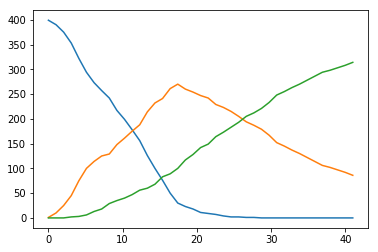

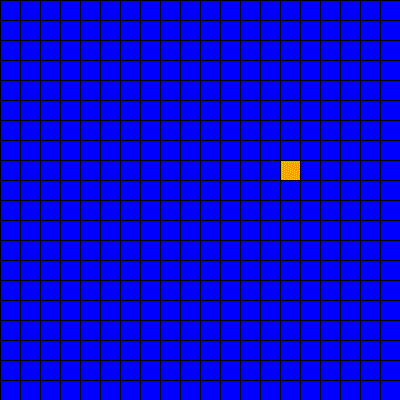

In [10]:
cellMap = CellMap(20,20) 
cellMap.placeInitialInfected(1)
simulation = Simulation(cellMap)
simulation.run(40)
simulation.generateGIF('cells1.gif',500,width= 400)
simulation.plot()
pil_img = IPython.display.Image(filename='cells1.gif')
display(pil_img)

## Simulation with much more cells :
with a lot more cells (250*250 = 62500), our graph looks very much like a SIR simulation,
also, the gif we get is quite monstrous.

In [ ]:
#CELLS:
map_width = 250
number_of_infected = 100
simulation_time = 100
CONTAGION = 0.2 
RECOVER = 0.05
number_of_cells = map_width **2

cellMap = CellMap(map_width,map_width) 
cellMap.placeInitialInfected(number_of_infected)
simulation = Simulation(cellMap)
simulation.run(simulation_time)
simulation.generateGIF('cells2.gif',width=500)

pil_img = IPython.display.Image(filename='cells2.gif')
display(pil_img)

simulation.plot()

## Comparaison with the SIR model:
If we take beta = 8*0.2 = 1.6 as 8 is the effective contacts proportion for 1 cell and 0.2 the contagion probability,
and lambda = RECOVER * 100 = 5 to run the sir simulation, 
we see that the results of both approches are very near:

# EXPLAIN HOW WE CHOOSE PARAMETERS FOR SIR

In [ ]:
#SIR:
METHODE = "Runge-Kutta d'ordre 4"
I0 = number_of_infected / number_of_cells
t0 = 0
T = 40 #simulation_time has to be adjusted manually to fit, which is pretty strange
n = 200
beta = 8 * CONTAGION
Lambda = 100 * RECOVER

schema_num("Runge-Kutta d'ordre 4", I0=I0, t0=t0, T=T, n=n, beta=beta, Lambda=Lambda, S_state=True, I_state=True, R_state=True)